# Project 
### **Determine Mean and S.D**: 

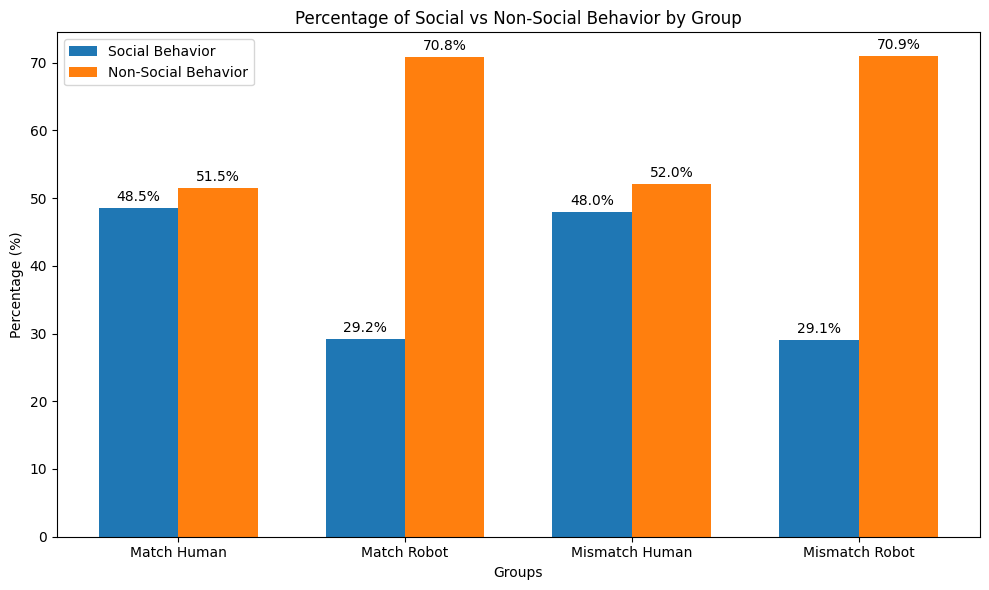

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Calculate sum of social and non-social behavior instances for each group
sum_values_social = [
    np.sum(filtered_hm['social_behavior']),
    np.sum(filtered_rm['social_behavior']),
    np.sum(filtered_hmis['social_behavior']),
    np.sum(filtered_rmis['social_behavior'])
]
sum_values_nonsocial = [
    np.sum(filtered_hm['nonsocial_behavior']),
    np.sum(filtered_rm['nonsocial_behavior']),
    np.sum(filtered_hmis['nonsocial_behavior']),
    np.sum(filtered_rmis['nonsocial_behavior'])
]

# Calculate total interaction values (social + nonsocial)
total_interaction_values = np.array(sum_values_social) + np.array(sum_values_nonsocial)

# Calculate percentages
social_percentages = np.array(sum_values_social) / total_interaction_values * 100
nonsocial_percentages = np.array(sum_values_nonsocial) / total_interaction_values * 100

# Group labels
groups = ['Match Human', 'Match Robot', 'Mismatch Human', 'Mismatch Robot']

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(groups))

bar1 = ax.bar(index, social_percentages, bar_width, label='Social Behavior')
bar2 = ax.bar(index + bar_width, nonsocial_percentages, bar_width, label='Non-Social Behavior')

ax.set_xlabel('Groups')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Social vs Non-Social Behavior by Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(groups)
ax.legend()

# Display percentages on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

### **Gender and time Stamp **: 

In [66]:
import pandas as pd

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Count 'M' and 'F' in each condition
count_hm = filtered_hm['Gender'].value_counts()
count_rm = filtered_rm['Gender'].value_counts()
count_hmis = filtered_hmis['Gender'].value_counts()
count_rmis = filtered_rmis['Gender'].value_counts()

# Print the counts
print("Counts for Human-Match:")
print(count_hm)
print("\nCounts for Robot-Match:")
print(count_rm)
print("\nCounts for Human-Mismatch:")
print(count_hmis)
print("\nCounts for Robot-Mismatch:")
print(count_rmis)

Counts for Human-Match:
Gender
F    12
M    12
Name: count, dtype: int64

Counts for Robot-Match:
Gender
M    15
F     8
Name: count, dtype: int64

Counts for Human-Mismatch:
Gender
M    12
F    12
Name: count, dtype: int64

Counts for Robot-Mismatch:
Gender
F    13
M    12
Name: count, dtype: int64


In [67]:
import pandas as pd
from datetime import datetime

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Assuming 'Time(Total)' column contains datetime.time values
# Convert 'Time(Total)' to total seconds (or another appropriate numeric format)
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

df['Time(Total)'] = df['Time(Total)'].apply(time_to_seconds)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Calculate mean of 'Time(Total)' for each group
mean_time_hm = filtered_hm['Time(Total)'].mean()
mean_time_rm = filtered_rm['Time(Total)'].mean()
mean_time_hmis = filtered_hmis['Time(Total)'].mean()
mean_time_rmis = filtered_rmis['Time(Total)'].mean()

# Print the mean values
print("Mean Time(Total) for Human-Match:", mean_time_hm)
print("Mean Time(Total) for Robot-Match:", mean_time_rm)
print("Mean Time(Total) for Human-Mismatch:", mean_time_hmis)
print("Mean Time(Total) for Robot-Mismatch:", mean_time_rmis)

Mean Time(Total) for Human-Match: 45.541666666666664
Mean Time(Total) for Robot-Match: 45.130434782608695
Mean Time(Total) for Human-Mismatch: 36.791666666666664
Mean Time(Total) for Robot-Mismatch: 42.92


# Box Plot  

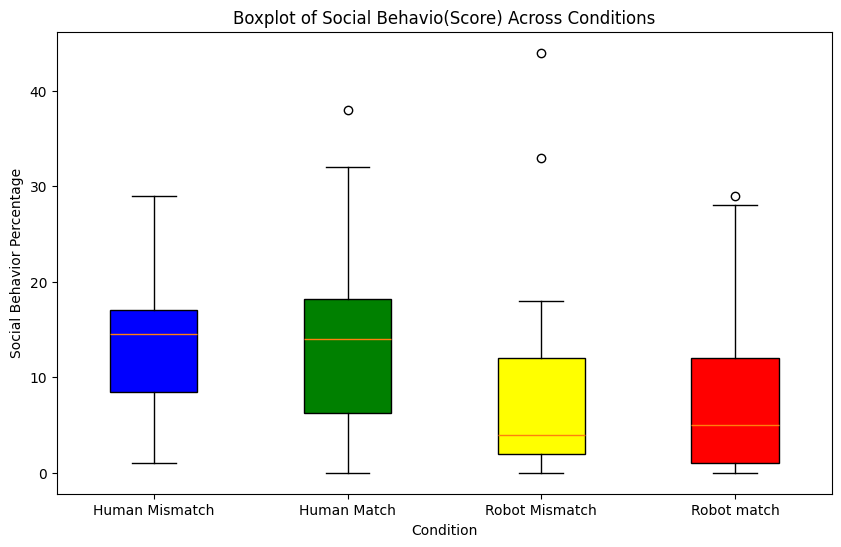

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming you have filtered dataframes for each condition
hm_data = filtered_hm['social_behavior']
rm_data = filtered_rm['social_behavior']
hmis_data = filtered_hmis['social_behavior']
rmis_data = filtered_rmis['social_behavior']
# Combine data into a list for boxplot visualization
data = [hm_data, rm_data, hmis_data, rmis_data]
labels = ['Human Match', 'Robot Match', 'Human Mismatch', 'Robot Mismatch']


data = [hmis_data, hm_data, rmis_data, rm_data]
labels = ['Human Mismatch', 'Human Match', 'Robot Mismatch', 'Robot match']
# Define colors for each condition
colors = ['blue', 'green', 'yellow', 'red']

# Create a boxplot using Matplotlib with colored boxes and showing outliers
plt.figure(figsize=(10, 6))

# Create boxplot with specified colors for boxes and show outliers
box = plt.boxplot(data, patch_artist=True, labels=labels, showfliers=True)

# Iterate over each box and set its color
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add titles and labels
plt.title('Boxplot of Social Behavio(Score) Across Conditions')
plt.xlabel('Condition')
plt.ylabel('Social Behavior Percentage')
plt.grid(False)
plt.show()

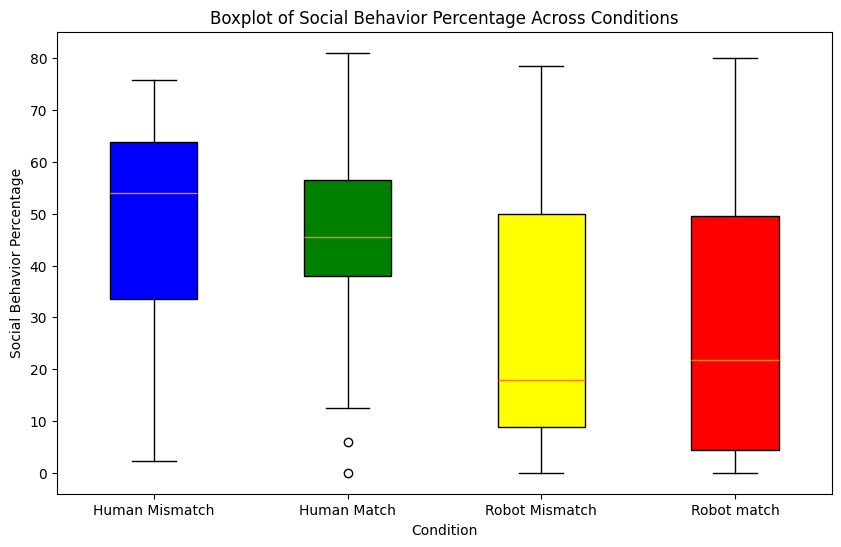

NameError: name 'kruskal' is not defined

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming you have filtered dataframes for each condition
hm_data = filtered_hm['social_behavior_percentage']
rm_data = filtered_rm['social_behavior_percentage']
hmis_data = filtered_hmis['social_behavior_percentage']
rmis_data = filtered_rmis['social_behavior_percentage']
# Combine data into a list for boxplot visualization
data = [hm_data, rm_data, hmis_data, rmis_data]
labels = ['Human Match', 'Robot Match', 'Human Mismatch', 'Robot Mismatch']


data = [hmis_data, hm_data, rmis_data, rm_data]
labels = ['Human Mismatch', 'Human Match', 'Robot Mismatch', 'Robot match']
# Define colors for each condition
colors = ['blue', 'green', 'yellow', 'red']

# Create a boxplot using Matplotlib with colored boxes and showing outliers
plt.figure(figsize=(10, 6))

# Create boxplot with specified colors for boxes and show outliers
box = plt.boxplot(data, patch_artist=True, labels=labels, showfliers=True)

# Iterate over each box and set its color
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add titles and labels
plt.title('Boxplot of Social Behavior Percentage Across Conditions')
plt.xlabel('Condition')
plt.ylabel('Social Behavior Percentage')
plt.grid(False)
plt.show()

H_stat, p_val = kruskal(hm_data, rm_data, hmis_data, rmis_data)

print("Kruskal-Wallis Test results across all conditions:")
print(f"H-statistic: {H_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference between at least two groups.")
else:
    print("There is no significant difference between groups.")

# Box Plot  (Percentage)


# Confidence of interval 

In [26]:
import numpy as np
from scipy import stats

# Define a function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin = stderr * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - margin, mean + margin

# Create a dictionary with filtered data
SocialInteractionCondata = {
    'Match Human': filtered_hm['social_behavior'],
    'Match Robot': filtered_rm['social_behavior'],
    'Mismatch Human': filtered_hmis['social_behavior'],
    'Mismatch Robot': filtered_rmis['social_behavior']
}

# Calculate and print confidence intervals for each condition
print("Confidence intervals (95%) for Social Interaction:")
for condition, data in SocialInteractionCondata.items():
    mean, lower, upper = confidence_interval(data)
    print(f"{condition}: Mean = {mean:.2f}, CI = [{lower:.2f}, {upper:.2f}]")

Confidence intervals (95%) for Social Interaction:
Match Human: Mean = 13.88, CI = [9.55, 18.20]
Match Robot: Mean = 7.65, CI = [3.91, 11.39]
Mismatch Human: Mean = 13.67, CI = [10.44, 16.89]
Mismatch Robot: Mean = 8.20, CI = [3.85, 12.55]


# Check the Normal Distribution of Each Case (Human Match)

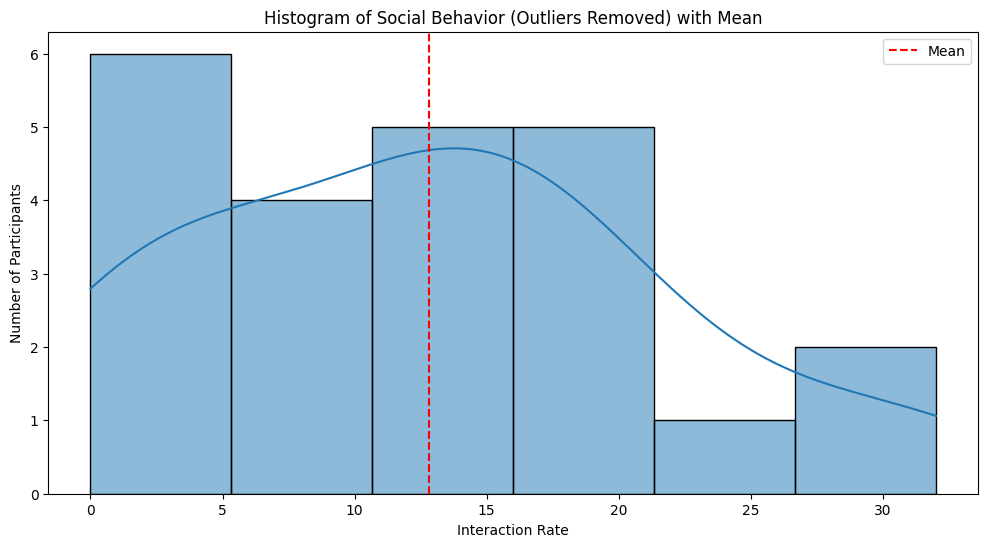

Shapiro-Wilk Test (Filtered Data):
Statistic = 0.9538425203673687, p-value = 0.3508200618224187
The filtered data appears to be normally distributed.
Participant IDs of the filtered data:
['OU05KO20', 'MA06EF18', 'VA06CK23', 'EN07ES21', 'EZ08IO17', 'ER09NN29', 'ER03RK11', 'ER07NG16', 'TE03IT03', 'LE06EG28', 'IN05AL10', 'KE06SI15', 'ER06EO23', 'ER09NZ02', 'NG06NS15', 'NN05LD09', 'HL06EN04', 'NN06US31', 'RS04NK10', 'ER06LO05', 'NG07EN21', 'TZ06RL21', 'ER09EF06']


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Ensure your DataFrame 'filtered_hmis' is already defined and contains the 'participant_id' and 'social_behavior' columns
# Example data
# filtered_hmis = pd.read_csv('path_to_your_file.csv')

# Select the 'participant_id' and 'social_behavior' columns for analysis
data_to_test = filtered_hm[['participant_id', 'social_behavior']]

# Removing outliers using the IQR method
Q1 = data_to_test['social_behavior'].quantile(0.25)
Q3 = data_to_test['social_behavior'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = data_to_test[(data_to_test['social_behavior'] >= lower_bound) & (data_to_test['social_behavior'] <= upper_bound)]

# Extract filtered 'social_behavior' data
filtered_social_behavior = filtered_data['social_behavior']

# Plotting a histogram with a kernel density estimate (KDE) of the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(filtered_social_behavior, kde=True)
# Adding a vertical line for the mean value of filtered data
plt.axvline(x=filtered_social_behavior.mean(), color='r', linestyle='--', label='Mean')
# Adding titles and labels
plt.title('Histogram of Social Behavior Human Match(Outliers Removed) with Mean')
plt.xlabel('Interaction Rate')
plt.ylabel('Number of Participants')
# Displaying the legend
plt.legend()
# Showing the plot
plt.show()

# Performing the Shapiro-Wilk test for normality on filtered data
statistic, p_value = stats.shapiro(filtered_social_behavior)
print(f"Shapiro-Wilk Test (Filtered Data):\nStatistic = {statistic}, p-value = {p_value}")

# Interpreting the p-value
if p_value > 0.05:
    print("The filtered data appears to be normally distributed.")
else:
    print("The filtered data does not appear to be normally distributed.")

# Displaying the participant_id values of the filtered data
print("Participant IDs of the filtered data:")
print(filtered_data['participant_id'].tolist())

# Check the Normal Distribution of Each Case (Robot Match)

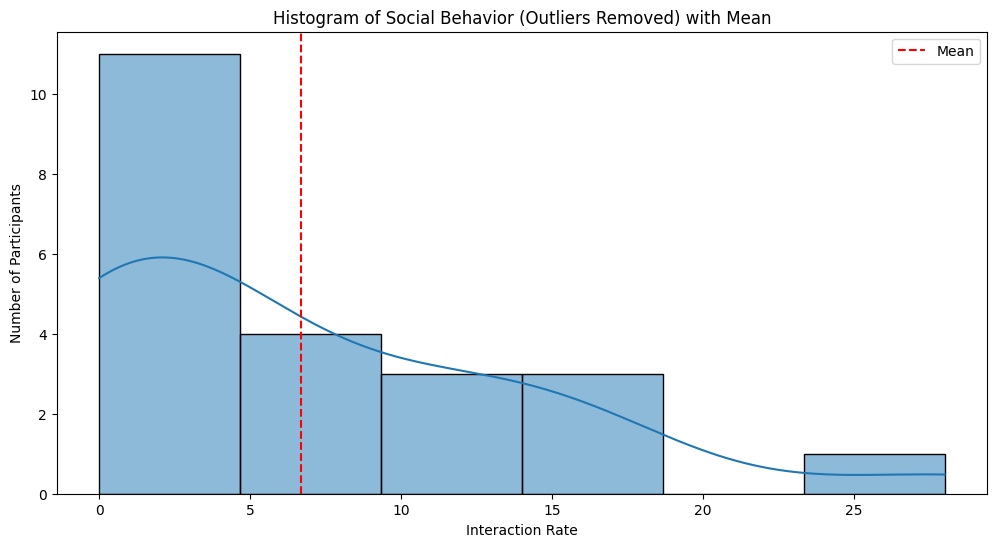

Shapiro-Wilk Test (Filtered Data):
Statistic = 0.8389137820641843, p-value = 0.002175076324728329
The filtered data does not appear to be normally distributed.
Participant IDs of the filtered data:
['NE06CH24', 'NN09ER02', 'TH03LF09', 'ER09OB09', 'YK09ER11', 'MP05NG26', 'EL06WE06', 'UL05AN17', 'OU06ED04', 'RI05AL30', 'NS06EL03', 'DE09El22', 'ER08NZ19', 'CH06US04', 'ER05AN01', 'EN07ER11', 'ER03RA24', 'NZ07ND21', 'EN04ASXX', 'HC03QL20', 'AH08HU07', 'IE07EX17']


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Ensure your DataFrame 'filtered_hmis' is already defined and contains the 'participant_id' and 'social_behavior' columns
# Example data
# filtered_hmis = pd.read_csv('path_to_your_file.csv')

# Select the 'participant_id' and 'social_behavior' columns for analysis
data_to_test = filtered_rm[['participant_id', 'social_behavior']]

# Removing outliers using the IQR method
Q1 = data_to_test['social_behavior'].quantile(0.25)
Q3 = data_to_test['social_behavior'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = data_to_test[(data_to_test['social_behavior'] >= lower_bound) & (data_to_test['social_behavior'] <= upper_bound)]

# Extract filtered 'social_behavior' data
filtered_social_behavior = filtered_data['social_behavior']

# Plotting a histogram with a kernel density estimate (KDE) of the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(filtered_social_behavior, kde=True)
# Adding a vertical line for the mean value of filtered data
plt.axvline(x=filtered_social_behavior.mean(), color='r', linestyle='--', label='Mean')
# Adding titles and labels
plt.title('Histogram of Social Behavior Robot match(Outliers Removed) with Mean')
plt.xlabel('Interaction Rate')
plt.ylabel('Number of Participants')
# Displaying the legend
plt.legend()
# Showing the plot
plt.show()

# Performing the Shapiro-Wilk test for normality on filtered data
statistic, p_value = stats.shapiro(filtered_social_behavior)
print(f"Shapiro-Wilk Test (Filtered Data):\nStatistic = {statistic}, p-value = {p_value}")

# Interpreting the p-value
if p_value > 0.05:
    print("The filtered data appears to be normally distributed.")
else:
    print("The filtered data does not appear to be normally distributed.")

# Displaying the participant_id values of the filtered data
print("Participant IDs of the filtered data:")
print(filtered_data['participant_id'].tolist())

# Check the Normal Distribution of Each Case (Human MisMatch)

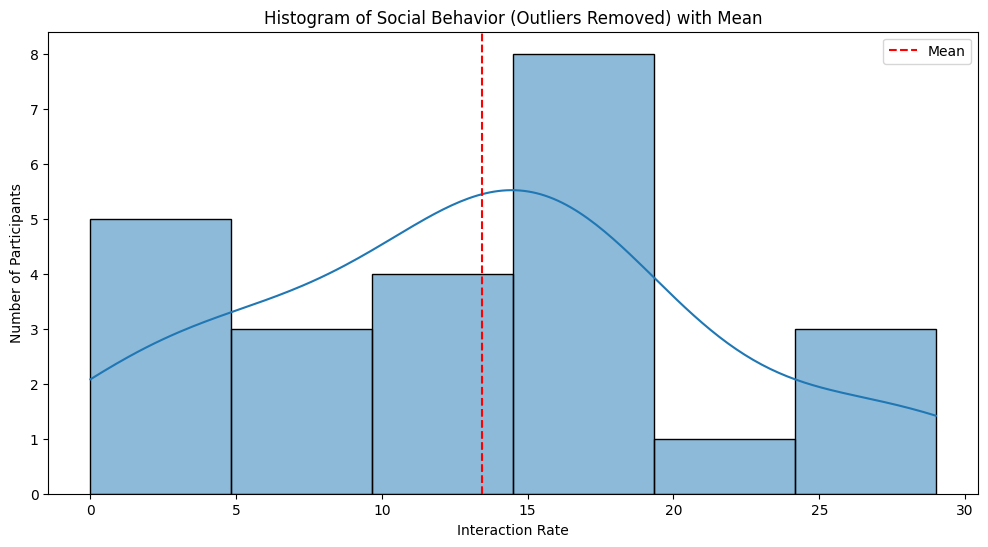

Shapiro-Wilk Test (Filtered Data):
Statistic = 0.9610485817897011, p-value = 0.4598529319592474
The filtered data appears to be normally distributed.
Participant IDs of the filtered data:
['KI06RD29', 'ez08io26', 'ER10AS25', 'ER09LM10', 'TZ05ER13', 'DL04US27', 'EL04RL21', 'NG08ER31', 'HM07NG15', 'AU10EL17', 'ER07RD09', 'EN06EL27', 'TZ06AS14', 'AN05AN17', 'UL06IS16', 'KE06EN24', 'IA05AS10', 'CU07IN02', 'YO07AN17', 'AK06UK20', 'KE08EF12', 'KE05IM01', 'SH09RD07', 'KI05LM23']


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Ensure your DataFrame 'filtered_hmis' is already defined and contains the 'participant_id' and 'social_behavior' columns
# Example data
# filtered_hmis = pd.read_csv('path_to_your_file.csv')

# Select the 'participant_id' and 'social_behavior' columns for analysis
data_to_test = filtered_hmis[['participant_id', 'social_behavior']]

# Removing outliers using the IQR method
Q1 = data_to_test['social_behavior'].quantile(0.25)
Q3 = data_to_test['social_behavior'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = data_to_test[(data_to_test['social_behavior'] >= lower_bound) & (data_to_test['social_behavior'] <= upper_bound)]

# Extract filtered 'social_behavior' data
filtered_social_behavior = filtered_data['social_behavior']

# Plotting a histogram with a kernel density estimate (KDE) of the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(filtered_social_behavior, kde=True)
# Adding a vertical line for the mean value of filtered data
plt.axvline(x=filtered_social_behavior.mean(), color='r', linestyle='--', label='Mean')
# Adding titles and labels
plt.title('Histogram of Social Behavior Human Mismatch (Outliers Removed) with Mean')
plt.xlabel('Interaction Rate')
plt.ylabel('Number of Participants')
# Displaying the legend
plt.legend()
# Showing the plot
plt.show()

# Performing the Shapiro-Wilk test for normality on filtered data
statistic, p_value = stats.shapiro(filtered_social_behavior)
print(f"Shapiro-Wilk Test (Filtered Data):\nStatistic = {statistic}, p-value = {p_value}")

# Interpreting the p-value
if p_value > 0.05:
    print("The filtered data appears to be normally distributed.")
else:
    print("The filtered data does not appear to be normally distributed.")

# Displaying the participant_id values of the filtered data
print("Participant IDs of the filtered data:")
print(filtered_data['participant_id'].tolist())

# Check the Normal Distribution of Each Case (Robot MisMatch)

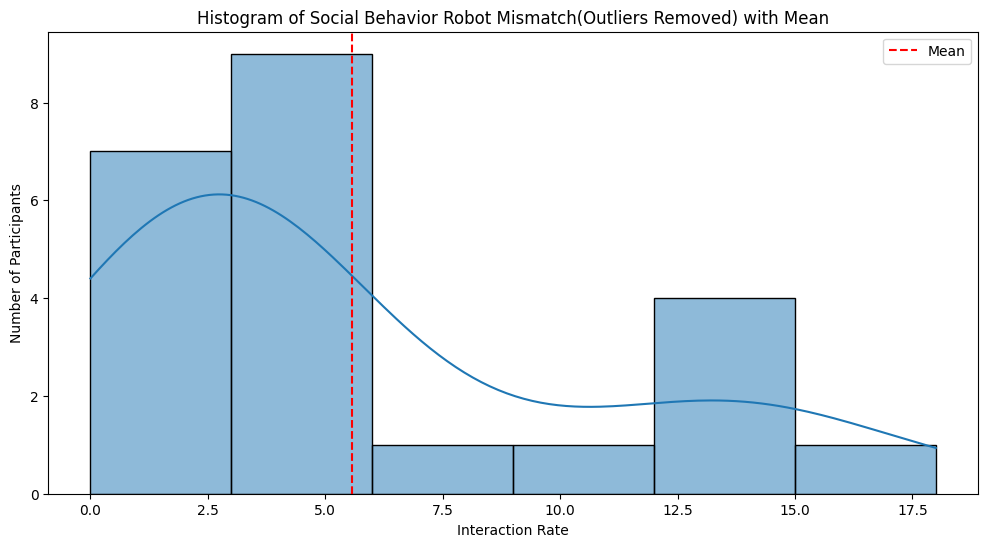

Shapiro-Wilk Test (Filtered Data):
Statistic = 0.8370346356612264, p-value = 0.0015977631847291828
The filtered data does not appear to be normally distributed.
Participant IDs of the filtered data:
['AZ05IM08', 'ON07CH19', 'YO07AN15', 'er04ls18', 'EI08RG16', 'ME06EL10', 'EN09US11', 'EN09US15', 'NN04EL08', 'TZ05HT15', 'CK07LM05', 'RG09RG21', 'LZ07AS16', 'EN09AR17', 'ER05US07', 'EN05EL20', 'RI06LO15', 'TA05IN13', 'ER04ED13', 'MS03EN19', 'ER06US12', 'CH05AS17', 'EA06IO03']


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Ensure your DataFrame 'filtered_hmis' is already defined and contains the 'participant_id' and 'social_behavior' columns
# Example data
# filtered_hmis = pd.read_csv('path_to_your_file.csv')

# Select the 'participant_id' and 'social_behavior' columns for analysis
data_to_test = filtered_rmis[['participant_id', 'social_behavior']]

# Removing outliers using the IQR method
Q1 = data_to_test['social_behavior'].quantile(0.25)
Q3 = data_to_test['social_behavior'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = data_to_test[(data_to_test['social_behavior'] >= lower_bound) & (data_to_test['social_behavior'] <= upper_bound)]

# Extract filtered 'social_behavior' data
filtered_social_behavior = filtered_data['social_behavior']

# Plotting a histogram with a kernel density estimate (KDE) of the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(filtered_social_behavior, kde=True)
# Adding a vertical line for the mean value of filtered data
plt.axvline(x=filtered_social_behavior.mean(), color='r', linestyle='--', label='Mean')
# Adding titles and labels
plt.title('Histogram of Social Behavior Robot Mismatch(Outliers Removed) with Mean')
plt.xlabel('Interaction Rate')
plt.ylabel('Number of Participants')
# Displaying the legend
plt.legend()
# Showing the plot
plt.show()

# Performing the Shapiro-Wilk test for normality on filtered data
statistic, p_value = stats.shapiro(filtered_social_behavior)
print(f"Shapiro-Wilk Test (Filtered Data):\nStatistic = {statistic}, p-value = {p_value}")

# Interpreting the p-value
if p_value > 0.05:
    print("The filtered data appears to be normally distributed.")
else:
    print("The filtered data does not appear to be normally distributed.")

# Displaying the participant_id values of the filtered data
print("Participant IDs of the filtered data:")
print(filtered_data['participant_id'].tolist())

# Kruskal Wallis Test

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Function to identify outliers using IQR method
def identify_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

# Identify outliers for each group
filtered_hm['is_outlier'] = identify_outliers(filtered_hm['social_behavior'])
filtered_rm['is_outlier'] = identify_outliers(filtered_rm['social_behavior'])
filtered_hmis['is_outlier'] = identify_outliers(filtered_hmis['social_behavior'])
filtered_rmis['is_outlier'] = identify_outliers(filtered_rmis['social_behavior'])

# Perform Kruskal-Wallis test across all conditions
hm_data = filtered_hm.loc[~filtered_hm['is_outlier'], 'social_behavior']
rm_data = filtered_rm.loc[~filtered_rm['is_outlier'], 'social_behavior']
hmis_data = filtered_hmis.loc[~filtered_hmis['is_outlier'], 'social_behavior']
rmis_data = filtered_rmis.loc[~filtered_rmis['is_outlier'], 'social_behavior']

H_stat, p_val = kruskal(hm_data, rm_data, hmis_data, rmis_data)

print("Kruskal-Wallis Test results across all conditions:")
print(f"H-statistic: {H_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference between at least two groups.")
else:
    print("There is no significant difference between groups.")


Kruskal-Wallis Test results across all conditions:
H-statistic: 12.7927, p-value: 0.0051
There is a significant difference between at least two groups.


C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\1301492042.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hm['is_outlier'] = identify_outliers(filtered_hm['social_behavior_percentage'])
C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\1301492042.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rm['is_outlier'] = identify_outliers(filtered_rm['social_behavior_percentage'])
C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\1301492042.py:30: SettingW

# T test for human match and mismatch

In [48]:
# Import necessary libraries
import pandas as pd
from scipy import stats

# Step 1: Load your data
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Filter your data
# Filter based on conditions
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]

# Step 3: Optional: Remove outliers
def remove_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

filtered_hm['is_outlier'] = identify_outliers(filtered_hm['social_behavior'])

filtered_hmis['is_outlier'] = identify_outliers(filtered_hmis['social_behavior'])


hm_data = filtered_hm.loc[~filtered_hm['is_outlier'], 'social_behavior']

hmis_data = filtered_hmis.loc[~filtered_hmis['is_outlier'], 'social_behavior']



# Step 4: Perform the t-test
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(hm_data, hmis_data)

# Step 5: Interpret the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Step 6: Determine if means are different based on p-value
alpha = 0.05  # Significance level

if p_value < alpha:
    print("The means of the 'Mismatch' and 'Match' groups are statistically different.")
else:
    print("There is no statistically significant difference between the means of the 'Mismatch' and 'Match' groups.")

T-statistic: -0.23731394133877726
P-value: 0.8134903694568894
There is no statistically significant difference between the means of the 'Mismatch' and 'Match' groups.


C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\2583180505.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hm['is_outlier'] = identify_outliers(filtered_hm['social_behavior'])
C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\2583180505.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hmis['is_outlier'] = identify_outliers(filtered_hmis['social_behavior'])


# Post adhoc test Dunn test with Bonferri correction

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Function to identify outliers using IQR method
def identify_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

# Identify outliers for each group
filtered_hm['is_outlier'] = identify_outliers(filtered_hm['social_behavior_percentage'])
filtered_rm['is_outlier'] = identify_outliers(filtered_rm['social_behavior_percentage'])
filtered_hmis['is_outlier'] = identify_outliers(filtered_hmis['social_behavior_percentage'])
filtered_rmis['is_outlier'] = identify_outliers(filtered_rmis['social_behavior_percentage'])

# Perform Kruskal-Wallis test across all conditions
hm_data = filtered_hm.loc[~filtered_hm['is_outlier'], 'social_behavior_percentage']
rm_data = filtered_rm.loc[~filtered_rm['is_outlier'], 'social_behavior_percentage']
hmis_data = filtered_hmis.loc[~filtered_hmis['is_outlier'], 'social_behavior_percentage']
rmis_data = filtered_rmis.loc[~filtered_rmis['is_outlier'], 'social_behavior_percentage']

H_stat, p_val = kruskal(hm_data, rm_data, hmis_data, rmis_data)

print("Kruskal-Wallis Test results across all conditions:")
print(f"H-statistic: {H_stat:.4f}, p-value: {p_val:.4f}")

# State the hypotheses for Kruskal-Wallis test
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to suggest that there is a significant difference between at least two groups.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not sufficient evidence to suggest that there is a significant difference between groups.")

# Perform Dunn's test with Bonferroni correction for pairwise comparisons
groups = ['Human-Match', 'Robot-Match', 'Human-Mismatch', 'Robot-Mismatch']
data = [hm_data, rm_data, hmis_data, rmis_data]

# Create DataFrame for post-hoc test
posthoc_df = pd.DataFrame()

for i, g1 in enumerate(groups):
    for j, g2 in enumerate(groups):
        if i < j:  # Only perform test once for each pair
            p_values = posthoc_dunn([data[i], data[j]], p_adjust='bonferroni')
            comparison = f"{g1} vs {g2}"
            posthoc_df.loc[comparison, 'p-value'] = p_values.iloc[0, 1]

print("\nPairwise comparisons (Dunn's test with Bonferroni correction):")
print(posthoc_df)

Kruskal-Wallis Test results across all conditions:
H-statistic: 12.7927, p-value: 0.0051
Reject the null hypothesis.
There is sufficient evidence to suggest that there is a significant difference between at least two groups.

Pairwise comparisons (Dunn's test with Bonferroni correction):
                                   p-value
Human-Match vs Robot-Match        0.020467
Human-Match vs Human-Mismatch     0.560000
Human-Match vs Robot-Mismatch     0.004413
Robot-Match vs Human-Mismatch     0.023926
Robot-Match vs Robot-Mismatch     0.812104
Human-Mismatch vs Robot-Mismatch  0.009035


C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\2977956267.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hm['is_outlier'] = identify_outliers(filtered_hm['social_behavior_percentage'])
C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\2977956267.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rm['is_outlier'] = identify_outliers(filtered_rm['social_behavior_percentage'])
C:\Users\Usman Zia Ullah\AppData\Local\Temp\ipykernel_22936\2977956267.py:30: SettingW

# Main Effect and Interaction

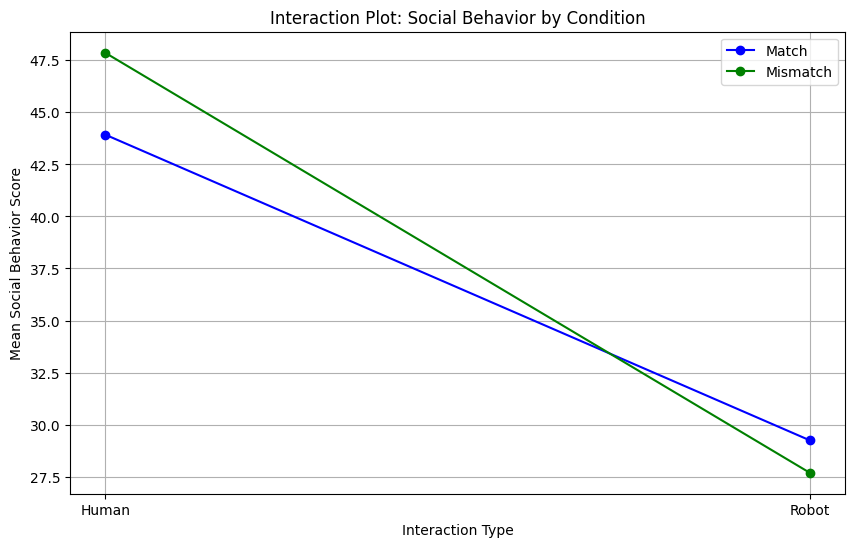

In [51]:
import matplotlib.pyplot as plt

# Data setup (assuming you have the mean values for each group)


match_means = [ np.mean(filtered_hm['social_behavior_percentage']), np.mean(filtered_rm['social_behavior_percentage'])]
mismatch_means = [np.mean(filtered_hmis['social_behavior_percentage']),np.mean(filtered_rmis['social_behavior_percentage'])]

# Create the intersection plot
plt.figure(figsize=(10, 6))

plt.plot(['Human', 'Robot'], match_means, marker='o', linestyle='-', color='b', label='Match')
plt.plot(['Human', 'Robot'], mismatch_means, marker='o', linestyle='-', color='g', label='Mismatch')

plt.title('Interaction Plot: Social Behavior by Condition')
plt.xlabel('Interaction Type')
plt.ylabel('Mean Social Behavior Score')
plt.legend()
plt.grid(True)
plt.show()

# Pos Doc Test

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
from statsmodels.stats.multitest import multipletests

# Example data (replace with your actual data)
# Assuming filtered_hm, filtered_rm, filtered_hmis, filtered_rmis are already defined

# Extract data into separate variables
hm_data = filtered_hm['social_behavior']
rm_data = filtered_rm['social_behavior']
hmis_data = filtered_hmis['social_behavior']
rmis_data = filtered_rmis['social_behavior']

# Combine data into a single DataFrame
data_combined = pd.DataFrame({
    'data': np.concatenate([hm_data, rm_data, hmis_data, rmis_data]),
    'group': np.repeat(['Human Match', 'Robot Match', 'Human Mismatch', 'Robot Mismatch'],
                       [len(hm_data), len(rm_data), len(hmis_data), len(rmis_data)])
})

# Initialize lists to store results
pairs = [('Human Match', 'Robot Match'), 
         ('Human Match', 'Human Mismatch'),
         ('Human Match', 'Robot Mismatch'), 
         ('Robot Match', 'Human Mismatch'),
         ('Robot Match', 'Robot Mismatch'), 
         ('Human Mismatch', 'Robot Mismatch')]

mannwhitney_p_values = []
statements = []

# Perform pairwise Mann-Whitney U tests
for group1, group2 in pairs:
    data1 = data_combined[data_combined['group'] == group1]['data']
    data2 = data_combined[data_combined['group'] == group2]['data']
    
    # Perform Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    mannwhitney_p_values.append(p_value)

    # Compare p-value with Benjamini-Hochberg corrected alpha = 0.05
    if p_value < 0.05:
        statement = f"Reject null hypothesis: There is a significant difference between {group1} and {group2}."
    else:
        statement = f"Fail to reject null hypothesis: There is no significant difference between {group1} and {group2}."
    
    statements.append(statement)

# Perform Kruskal-Wallis H test for comparing multiple groups
if len(set(data_combined['group'])) > 1:
    kruskal_stat, kruskal_p_value = kruskal(*[data_combined[data_combined['group'] == group]['data'] for group in set(data_combined['group'])])
else:
    kruskal_p_value = None

# Create results DataFrame
results_df = pd.DataFrame({
    'Group 1': [pair[0] for pair in pairs],
    'Group 2': [pair[1] for pair in pairs],
    'Mann-Whitney U p-value': mannwhitney_p_values,
    'Verdict': statements
})

# Apply Benjamini-Hochberg correction to Mann-Whitney U p-values
results_df['Benjamini-Hochberg corrected p-value'] = multipletests(mannwhitney_p_values, method='fdr_bh')[1]

# Check which hypotheses are rejected based on the corrected p-values
results_df['Significant'] = results_df['Benjamini-Hochberg corrected p-value'] < 0.05

# Print results with significant findings
print("Pairwise Comparisons (Mann-Whitney U and Kruskal-Wallis Tests):")
print(results_df[results_df['Significant']])

# Add Kruskal-Wallis results to results_df
if kruskal_p_value is not None:
    results_df['Kruskal-Wallis p-value'] = kruskal_p_value

# Print final results including Kruskal-Wallis test
print("\nFinal Results:")
print(results_df)


Pairwise Comparisons (Mann-Whitney U and Kruskal-Wallis Tests):
          Group 1         Group 2  Mann-Whitney U p-value  \
0     Human Match     Robot Match                0.016886   
2     Human Match  Robot Mismatch                0.019952   
3     Robot Match  Human Mismatch                0.013299   
5  Human Mismatch  Robot Mismatch                0.009440   

                                             Verdict  \
0  Reject null hypothesis: There is a significant...   
2  Reject null hypothesis: There is a significant...   
3  Reject null hypothesis: There is a significant...   
5  Reject null hypothesis: There is a significant...   

   Benjamini-Hochberg corrected p-value  Significant  
0                              0.029928         True  
2                              0.029928         True  
3                              0.029928         True  
5                              0.029928         True  

Final Results:
          Group 1         Group 2  Mann-Whitney U p-value 

# Pos Doc Test(Mixed approached)

# Percentage of Social Interaction(Discussion section)

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming you have filtered dataframes for each condition


percentage_social_total = [
    np.sum(filtered_hm['social_behavior_percentage']),
    np.sum(filtered_rm['social_behavior_percentage']),
    np.sum(filtered_hmis['social_behavior_percentage']),
    np.sum(filtered_rmis['social_behavior_percentage'])
]

percentage_social_moving = [
    np.sum(filtered_hm['moving_score_percentage']),
    np.sum(filtered_rm['moving_score_percentage']),
    np.sum(filtered_hmis['moving_score_percentage']),
    np.sum(filtered_rmis['moving_score_percentage'])
]
percentage_social_laughing = [
    np.sum(filtered_hm['laughing_score_percentage']),
    np.sum(filtered_rm['laughing_score_percentage']),
    np.sum(filtered_hmis['laughing_score_percentage']),
    np.sum(filtered_rmis['laughing_score_percentage'])
]
percentage_social_gazing = [
    np.sum(filtered_hm['gazing_score_percentage']),
    np.sum(filtered_rm['gazing_score_percentage']),
    np.sum(filtered_hmis['gazing_score_percentage']),
    np.sum(filtered_rmis['gazing_score_percentage'])
]

percentage_social_talk = [
    np.sum(filtered_hm['talking_score_percentage']),
    np.sum(filtered_rm['talking_score_percentage']),
    np.sum(filtered_hmis['talking_score_percentage']),
    np.sum(filtered_rmis['talking_score_percentage'])
]
percentage_social_touch = [
    np.sum(filtered_hm['touching_score_percentage']),
    np.sum(filtered_rm['touching_score_percentage']),
    np.sum(filtered_hmis['touching_score_percentage']),
    np.sum(filtered_rmis['touching_score_percentage'])
]
percentage_social_other = [
    np.sum(filtered_hm['other_score_percentage']),
    np.sum(filtered_rm['other_score_percentage']),
    np.sum(filtered_hmis['other_score_percentage']),
    np.sum(filtered_rmis['other_score_percentage'])
]





print("[Human Match:Robot Match :Human Mismatch: Robot Mismatch]")
print("----------------------------------------------------------------------------")
print("[moving_score_percentage]")
resultmoving =[a/b*100 for a,b in zip(percentage_social_moving,percentage_social_total)]
print(resultmoving)
print("----------------------------------------------------------------------------")
print("[percentage_social_laughing]")
resultlaugh =[a/b*100 for a,b in zip(percentage_social_laughing,percentage_social_total)]
print(resultlaugh)
print("----------------------------------------------------------------------------")
print("[percentage_social_gazing]")
resultgaze =[a/b*100 for a,b in zip(percentage_social_gazing,percentage_social_total)]
print(resultgaze)
print("----------------------------------------------------------------------------")
print("[percentage_social_talk]")
resulttalk =[a/b*100 for a,b in zip(percentage_social_talk,percentage_social_total)]
print(resulttalk)

print("----------------------------------------------------------------------------")
print("[percentage_social_touch]")
resulttouch =[a/b*100 for a,b in zip(percentage_social_touch,percentage_social_total)]
print(resulttouch)

print("----------------------------------------------------------------------------")
print("[percentage_social_other]")
resultother =[a/b*100 for a,b in zip(percentage_social_other,percentage_social_total)]
print(resultother)




[Human Match:Robot Match :Human Mismatch: Robot Mismatch]
----------------------------------------------------------------------------
[moving_score_percentage]
[12.223744784533766, 20.39823889199312, 13.310423509942309, 22.3215655703116]
----------------------------------------------------------------------------
[percentage_social_laughing]
[4.212978146796228, 7.49050254707724, 9.866064721591526, 0.370450998819431]
----------------------------------------------------------------------------
[percentage_social_gazing]
[21.340646054410264, 49.85060477081834, 20.606905511634462, 56.54102400133782]
----------------------------------------------------------------------------
[percentage_social_talk]
[50.65474891337244, 11.58773360709552, 49.86385098476298, 12.961490883819085]
----------------------------------------------------------------------------
[percentage_social_touch]
[0.0, 3.2211548502804668, 0.0, 0.0]
----------------------------------------------------------------------------


# PieChart(Human Match)

[PieChart Human Match]


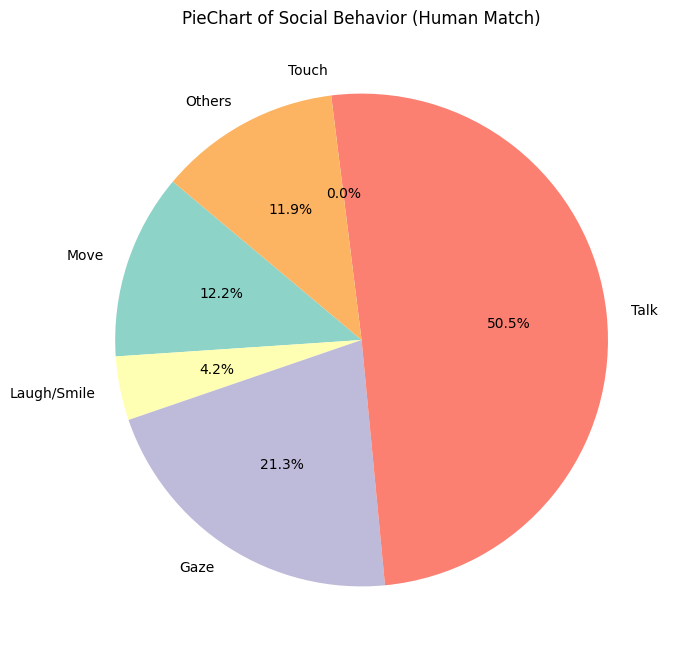

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Assuming you have filtered dataframes for each condition

print("[PieChart Human Match]")
# Plot pie chart for moving_score_percentage
# Combine the results into a list
resultHumanMatchforChart = [resultmoving[0], resultlaugh[0], resultgaze[0], resulttalk[0], resulttouch[0], resultother[0]]

# Labels for the pie chart
labels = ['Move', 'Laugh/Smile', 'Gaze', 'Talk', 'Touch', 'Others']

# Define fancy colors (using a colormap)
colors = plt.get_cmap('Set3').colors  # 'Set3' is a nice colormap for pie charts

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(resultHumanMatchforChart, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('PieChart of Social Behavior (Human Match)')
plt.grid(True)
plt.show()


[PieChart Robot Match]


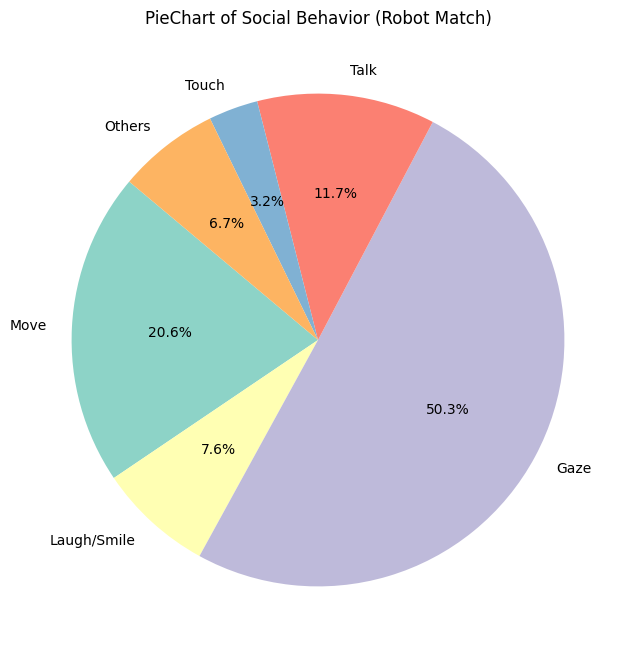

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Assuming you have filtered dataframes for each condition

print("[PieChart Robot Match]")
# Plot pie chart for moving_score_percentage


resultrobotMatchforChart = [resultmoving[1], resultlaugh[1], resultgaze[1], resulttalk[1], resulttouch[1], resultother[1]]

# Labels for the pie chart
labels = ['Move', 'Laugh/Smile', 'Gaze', 'Talk', 'Touch', 'Others']

# Define fancy colors (using a colormap)
colors = plt.get_cmap('Set3').colors  # 'Set3' is a nice colormap for pie charts

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(resultrobotMatchforChart, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('PieChart of Social Behavior (Robot Match)')
plt.grid(True)
plt.show()


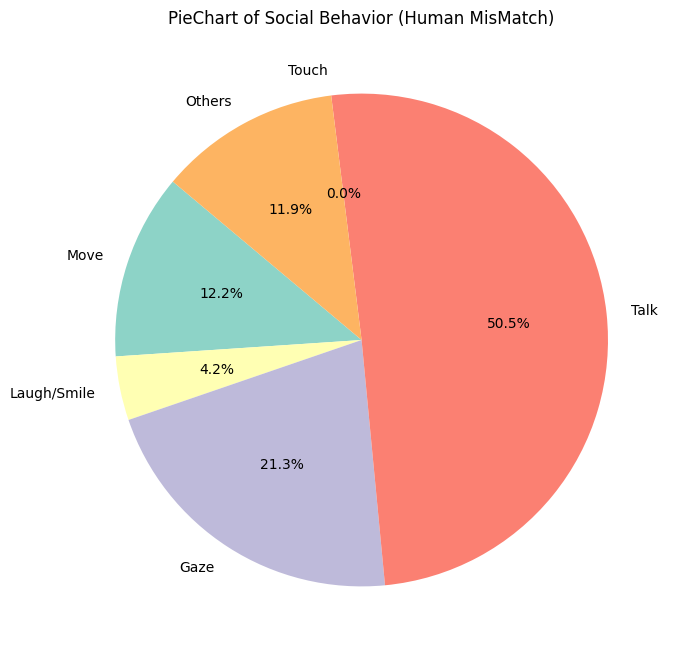

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Assuming you have filtered dataframes for each condition

presultHumanMisMatchforChart = [resultmoving[2], resultlaugh[2], resultgaze[2], resulttalk[2], resulttouch[2], resultother[2]]

# Labels for the pie chart
labels = ['Move', 'Laugh/Smile', 'Gaze', 'Talk', 'Touch', 'Others']

# Define fancy colors (using a colormap)
colors = plt.get_cmap('Set3').colors  # 'Set3' is a nice colormap for pie charts

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(resultHumanMatchforChart, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('PieChart of Social Behavior (Human MisMatch)')
plt.grid(True)
plt.show()


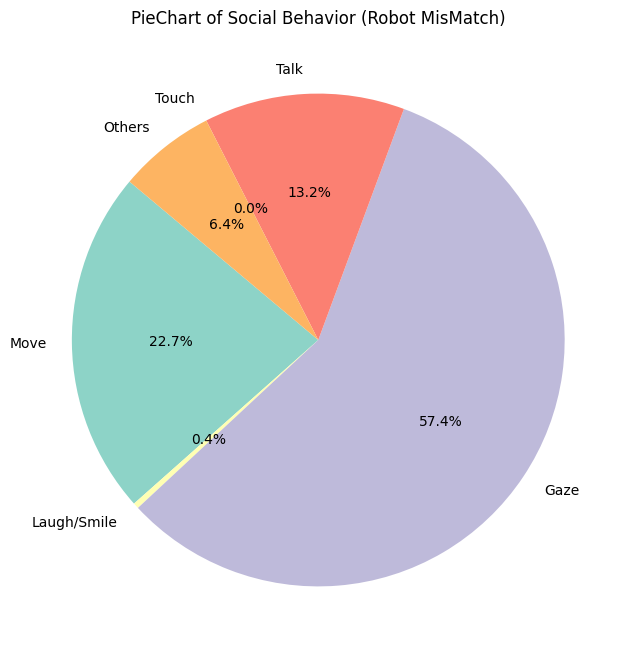

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Assuming you have filtered dataframes for each condition


resultrobotMatchforChart = [resultmoving[3], resultlaugh[3], resultgaze[3], resulttalk[3], resulttouch[3], resultother[3]]

# Labels for the pie chart
labels = ['Move', 'Laugh/Smile', 'Gaze', 'Talk', 'Touch', 'Others']

# Define fancy colors (using a colormap)
colors = plt.get_cmap('Set3').colors  # 'Set3' is a nice colormap for pie charts

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(resultrobotMatchforChart, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('PieChart of Social Behavior (Robot MisMatch)')
plt.grid(True)
plt.show()


# Spearman Correlation (Proximity Distance)

In [121]:
import pandas as pd
import scipy.stats as stats

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Define the ordinal encoding
ordinal_encoding = {'Close': 3, 'Mid': 2, 'Far': 1}

# Encode ordinal data
encoded_ordinal_datahm = [ordinal_encoding[item] for item in filtered_hm['sitting_distance']]
encoded_ordinal_datarm = [ordinal_encoding[item] for item in filtered_rm['sitting_distance']]
encoded_ordinal_datahmis = [ordinal_encoding[item] for item in filtered_hmis['sitting_distance']]
encoded_ordinal_datarmis = [ordinal_encoding[item] for item in filtered_rmis['sitting_distance']]

# Continuous data for social interaction
social_interaction_hm = filtered_hm['social_behavior_percentage']
social_interaction_hmis = filtered_hmis['social_behavior_percentage']
social_interaction_rm = filtered_rm['social_behavior_percentage']
social_interaction_rmis = filtered_rmis['social_behavior_percentage']

# Calculate Spearman's rank correlation
spearman_corrhm, spearman_p_valuehm = stats.spearmanr(encoded_ordinal_datahm, social_interaction_hm)
spearman_corrrm, spearman_p_valuerm = stats.spearmanr(encoded_ordinal_datarm, social_interaction_rm)
spearman_corrhmis, spearman_p_valuehmis = stats.spearmanr(encoded_ordinal_datahmis, social_interaction_hmis)
spearman_corrrmis, spearman_p_valuermis = stats.spearmanr(encoded_ordinal_datarmis, social_interaction_rmis)

# Print the results
print(f"Spearman's rank correlation for Human Match: {spearman_corrhm}, p-value: {spearman_p_valuehm}")
print(f"Spearman's rank correlation for Robot Match: {spearman_corrrm}, p-value: {spearman_p_valuerm}")
print(f"Spearman's rank correlation for Human Mismatch: {spearman_corrhmis}, p-value: {spearman_p_valuehmis}")
print(f"Spearman's rank correlation for Robot Mismatch: {spearman_corrrmis}, p-value: {spearman_p_valuermis}")

Spearman's rank correlation for Human Match: -0.1947086030678143, p-value: 0.36191558562233495
Spearman's rank correlation for Robot Match: 0.035197267791767545, p-value: 0.8733256357192059
Spearman's rank correlation for Human Mismatch: -0.15748798301310618, p-value: 0.4623707730058114
Spearman's rank correlation for Robot Mismatch: -0.19812306994150714, p-value: 0.3424395297959083


# Spearman Correlation (Proximity angle)

In [122]:
import pandas as pd
import scipy.stats as stats

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Define the ordinal encoding
ordinal_encoding = {'Parallel': 3, '45degrees': 2, 'Perpendicular': 1}

# Encode ordinal data
encoded_ordinal_datahm = [ordinal_encoding[item] for item in filtered_hm['sitting_angle']]
encoded_ordinal_datarm = [ordinal_encoding[item] for item in filtered_rm['sitting_angle']]
encoded_ordinal_datahmis = [ordinal_encoding[item] for item in filtered_hmis['sitting_angle']]
encoded_ordinal_datarmis = [ordinal_encoding[item] for item in filtered_rmis['sitting_angle']]

# Continuous data for social interaction
social_interaction_hm = filtered_hm['social_behavior_percentage']
social_interaction_hmis = filtered_hmis['social_behavior_percentage']
social_interaction_rm = filtered_rm['social_behavior_percentage']
social_interaction_rmis = filtered_rmis['social_behavior_percentage']

# Calculate Spearman's rank correlation
spearman_corrhm, spearman_p_valuehm = stats.spearmanr(encoded_ordinal_datahm, social_interaction_hm)
spearman_corrrm, spearman_p_valuerm = stats.spearmanr(encoded_ordinal_datarm, social_interaction_rm)
spearman_corrhmis, spearman_p_valuehmis = stats.spearmanr(encoded_ordinal_datahmis, social_interaction_hmis)
spearman_corrrmis, spearman_p_valuermis = stats.spearmanr(encoded_ordinal_datarmis, social_interaction_rmis)

# Print the results
print(f"Spearman's rank correlation for Human Match: {spearman_corrhm}, p-value: {spearman_p_valuehm}")
print(f"Spearman's rank correlation for Robot Match: {spearman_corrrm}, p-value: {spearman_p_valuerm}")
print(f"Spearman's rank correlation for Human Mismatch: {spearman_corrhmis}, p-value: {spearman_p_valuehmis}")
print(f"Spearman's rank correlation for Robot Mismatch: {spearman_corrrmis}, p-value: {spearman_p_valuermis}")

Spearman's rank correlation for Human Match: 0.029649633272401277, p-value: 0.8906129812482907
Spearman's rank correlation for Robot Match: -0.19606717342598967, p-value: 0.36992455633817256
Spearman's rank correlation for Human Mismatch: 0.0, p-value: 1.0
Spearman's rank correlation for Robot Mismatch: 0.1125207973462188, p-value: 0.5922997218426382


In [126]:
import pandas as pd
import scipy.stats as stats

# Load the Excel file
file_path = 'behavior_report_usman.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Filter the rows where "fitting_status" is "Match" and "target_of_interaction" is "Human" or "Robot"
filtered_hm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Human')]
filtered_rm = df[(df['fitting_status'] == 'Match') & (df['target_of_interaction'] == 'Robot')]
filtered_hmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Human')]
filtered_rmis = df[(df['fitting_status'] == 'Mismatch') & (df['target_of_interaction'] == 'Robot')]

# Define the ordinal encoding
ordinal_encoding_distance = {'Close': 3, 'Mid': 2, 'Far': 1}
ordinal_encoding_angle = {'Parallel': 3, '45degrees': 2, 'Perpendicular': 1}

# Encode ordinal data for sitting distance
encoded_ordinal_datahmd = [ordinal_encoding_distance[item] for item in filtered_hm['sitting_distance']]
encoded_ordinal_datarmd = [ordinal_encoding_distance[item] for item in filtered_rm['sitting_distance']]
encoded_ordinal_datahmisd = [ordinal_encoding_distance[item] for item in filtered_hmis['sitting_distance']]
encoded_ordinal_datarmisd = [ordinal_encoding_distance[item] for item in filtered_rmis['sitting_distance']]

# Encode ordinal data for sitting angle
encoded_ordinal_datahma = [ordinal_encoding_angle[item] for item in filtered_hm['sitting_angle']]
encoded_ordinal_datarma = [ordinal_encoding_angle[item] for item in filtered_rm['sitting_angle']]
encoded_ordinal_datahmisa = [ordinal_encoding_angle[item] for item in filtered_hmis['sitting_angle']]
encoded_ordinal_datarmisa = [ordinal_encoding_angle[item] for item in filtered_rmis['sitting_angle']]

# Calculate Spearman's rank correlation
spearman_corrhm, spearman_p_valuehm = stats.spearmanr(encoded_ordinal_datahmd, encoded_ordinal_datahma)
spearman_corrrm, spearman_p_valuerm = stats.spearmanr(encoded_ordinal_datarmd, encoded_ordinal_datarma)
spearman_corrhmis, spearman_p_valuehmis = stats.spearmanr(encoded_ordinal_datahmisd, encoded_ordinal_datahmisa)
spearman_corrrmis, spearman_p_valuermis = stats.spearmanr(encoded_ordinal_datarmisd, encoded_ordinal_datarmisa)

# Print the results
print(f"Spearman's rank correlation for Human Match: {spearman_corrhm}, p-value: {spearman_p_valuehm}")
print(f"Spearman's rank correlation for Robot Match: {spearman_corrrm}, p-value: {spearman_p_valuerm}")
print(f"Spearman's rank correlation for Human Mismatch: {spearman_corrhmis}, p-value: {spearman_p_valuehmis}")
print(f"Spearman's rank correlation for Robot Mismatch: {spearman_corrrmis}, p-value: {spearman_p_valuermis}")

Spearman's rank correlation for Human Match: 0.3757796072599921, p-value: 0.07035067044301825
Spearman's rank correlation for Robot Match: 0.6505409838740464, p-value: 0.0007765945509723983
Spearman's rank correlation for Human Mismatch: 0.08936607692851886, p-value: 0.6779488956172136
Spearman's rank correlation for Robot Mismatch: 0.5444655064804708, p-value: 0.004893935570855821
